In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [18]:
train=pd.read_csv('train_data.csv')
train


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [19]:
test=pd.read_csv('test_data.csv')
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [4]:
x_train=train.drop(['label'],axis=1).values
x_train

array([[ 59,  62,  63, ..., 123,  92,  72],
       [154, 177, 187, ..., 143, 133, 144],
       [255, 255, 255, ...,  80,  86,  84],
       ...,
       [ 35, 178, 235, ...,  12,  31,  50],
       [189, 211, 240, ..., 195, 190, 171],
       [229, 229, 239, ..., 163, 163, 161]], dtype=int64)

In [5]:
x_train=x_train/255.0

In [6]:
y_train=train['label'].values
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=int64)

In [7]:
x_test=test.drop(['label'],axis=1).values
x_test

array([[158, 112,  49, ...,  21,  67, 110],
       [235, 235, 235, ..., 186, 200, 199],
       [158, 190, 222, ...,   7,   8,   7],
       ...,
       [ 20,  15,  12, ...,  25,  20,  47],
       [ 25,  40,  12, ...,  92, 120,  80],
       [ 73,  78,  75, ...,  27,  26,  26]], dtype=int64)

In [8]:
y_test=test['label'].values
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [20]:
x_train=x_train/255.0
x_test=x_test/255.0

x_train=np.reshape(x_train,(-1,32,32,3))

#x_train=np.reshape(x_train,(-1,32,32,3))
#y_train=np.reshape(y_train,(-1,32,32,3))

print(x_train.shape)

(50000, 32, 32, 3)


In [21]:
from sklearn.preprocessing import LabelBinarizer

LB= LabelBinarizer()
y_train=LB.fit_transform(y_train)

In [22]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10,activation='softmax'))

sgd = SGD(learning_rate=0.1,momentum=0.9,nesterov=0.1)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_2 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [23]:
#x_train=np.asarray(x_train)

#x_train=tf.convert_to_tensor(x_train)
history = model.fit(x_train,y_train,epochs=11,batch_size=512)

Epoch 1/11


98/98 [==============================] - 37s 366ms/step - loss: 2.1130 - accuracy: 0.2327
Epoch 2/11
98/98 [==============================] - 36s 370ms/step - loss: 1.8589 - accuracy: 0.3408
Epoch 3/11
98/98 [==============================] - 36s 367ms/step - loss: 1.6476 - accuracy: 0.4079
Epoch 4/11
98/98 [==============================] - 39s 396ms/step - loss: 1.4338 - accuracy: 0.4824
Epoch 5/11
98/98 [==============================] - 36s 368ms/step - loss: 1.3431 - accuracy: 0.5166
Epoch 6/11
98/98 [==============================] - 40s 410ms/step - loss: 1.2522 - accuracy: 0.5478
Epoch 7/11
98/98 [==============================] - 34s 348ms/step - loss: 1.1802 - accuracy: 0.5731
Epoch 8/11
98/98 [==============================] - 33s 337ms/step - loss: 1.1232 - accuracy: 0.5969
Epoch 9/11
98/98 [==============================] - 33s 341ms/step - loss: 1.0555 - accuracy: 0.6203
Epoch 10/11
98/98 [==============================] - 34s 345ms/step - loss: 1.0048 - accu

In [25]:
x_test=np.reshape(x_test,(-1,32,32,3))
y_test=LB.fit_transform(y_test)

In [26]:
pred = model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [27]:
test_loss,test_accuracy= model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 239.9008 - accuracy: 0.2746


In [28]:
print(f"Loss     = {loss:.4f}")
print(f"Accuracy = {accuracy*100:.2f}%")

Loss     = 239.9008
Accuracy = 27.46%


KeyError: 'val_accuracy'

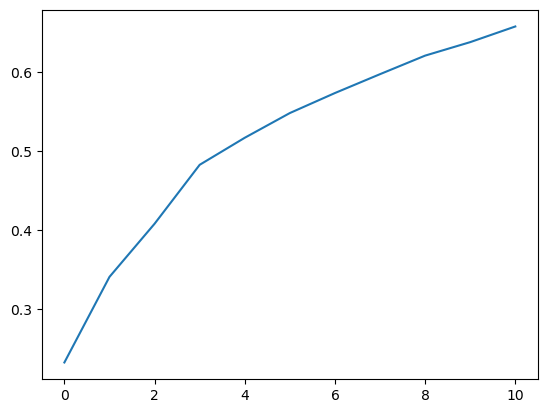

In [29]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


KeyError: 'val_loss'

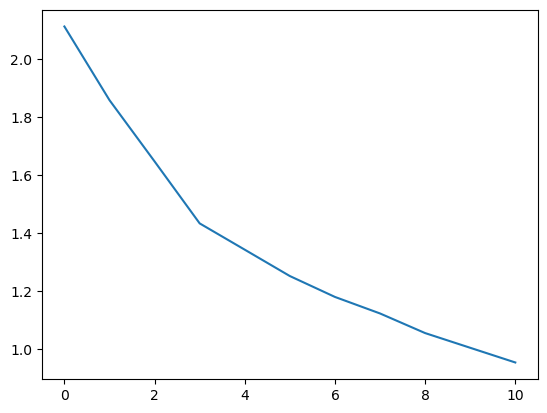

In [30]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [31]:
pred=model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [32]:
print(y_test)
print(np.argmax(pred,axis=1))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
[3 1 0 ... 5 0 7]


Predicted class:
1


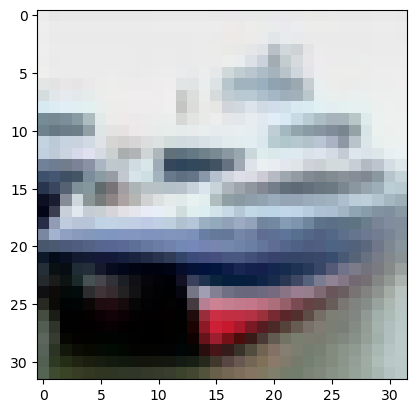

In [33]:
ind=1
plt.imshow(x_test[ind].reshape(32,32,3))
print("Predicted class:")
print(np.argmax(pred[ind]))